In [1]:
import pandas as pd
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib.colors import ListedColormap
import numpy as np
from matplotlib.pyplot import *

%matplotlib inline

In [2]:
data = pd.read_csv('./Moz cash flows share.csv - Moz cash flows share.csv.csv', sep=',')

In [5]:
data.id_member.nunique()

311

In [7]:
data.shape

(21163, 15)

In [4]:
data.columns

Index([u'household_code', u'id_member', u'interview_datetime',
       u'cashflow_date', u'account_name', u'root_category', u'cf_category',
       u'cf_type', u'cf_direction', u'cf_bsheet_direction', u'agrprodtype',
       u'value', u'cashflow_mode', u'unitsgoodservice', u'valueifinkind'],
      dtype='object')

In [5]:
data.head()

household_code  id_member  interview_datetime cashflow_date account_name  \
0        MONEM65        3.0   9/2/2014 10:14:00     8/19/2014          NaN   
1        MONEM65        7.0   1/10/2015 9:05:00      1/2/2015          NaN   
2        MONEM65        NaN  8/20/2014 10:05:00     8/19/2014          NaN   
3        MONEM65        3.0    2/4/2015 9:05:00     1/15/2015          NaN   
4        MONEM65        5.0  12/5/2014 13:33:00    11/27/2014          NaN   

          root_category                                        cf_category  \
0        Physical Asset                                       Farming tool   
1  Operational Expenses  Groceries/food to be eaten at home (include ba...   
2  Operational Expenses                                  Clothes and shoes   
3  Operational Expenses  Groceries/food to be eaten at home (include ba...   
4  Operational Expenses  Groceries/food to be eaten at home (include ba...   

       cf_type cf_direction cf_bsheet_direction agrprodtype  value  \
0  1. Purchase          Out            Increase         NaN   60.0   
1    Purchases          Out                 NaN         NaN   20.0   
2    Purchases          Out                 NaN         NaN  200.0   
3    Purchases          Out                 NaN         NaN   50.0   
4    Purchases          Out                 NaN         NaN   20.0   

  cashflow_mode unitsgoodservice valueifinkind  
0       01=Cash              NaN           NaN  
1       01=Cash              NaN           NaN  
2       01=Cash              NaN           NaN  
3       01=Cash              NaN           NaN  
4       01=Cash              NaN           NaN

In [6]:
data.tail()

household_code  id_member  interview_datetime cashflow_date  \
21158       MORMEA29      508.0   6/5/2015 14:05:00      6/3/2015   
21159       MORMEA29      508.0  12/5/2014 11:04:00    11/24/2014   
21160       MORMEA29      508.0  8/14/2014 11:56:00      8/5/2014   
21161       MORMEA29      508.0  5/20/2015 13:13:00     5/14/2015   
21162       MORMEA29      508.0   9/29/2014 9:00:00     9/21/2014   

      account_name       root_category      cf_category              cf_type  \
21158        SEI01  Operational Income  Self-employment  1. Revenue or Sales   
21159        SEI01  Operational Income  Self-employment   3. Stock purchases   
21160        SEI01  Operational Income  Self-employment   3. Stock purchases   
21161        SEI01  Operational Income  Self-employment   3. Stock purchases   
21162        SEI01  Operational Income  Self-employment  1. Revenue or Sales   

      cf_direction cf_bsheet_direction agrprodtype  value cashflow_mode  \
21158           In                 NaN         NaN  150.0       01=Cash   
21159          Out                 NaN         NaN  112.0       01=Cash   
21160          Out                 NaN         NaN  120.0       01=Cash   
21161          Out                 NaN         NaN  140.0       01=Cash   
21162           In                 NaN         NaN  200.0       01=Cash   

      unitsgoodservice valueifinkind  
21158              NaN           NaN  
21159              NaN           NaN  
21160              NaN           NaN  
21161              NaN           NaN  
21162              NaN           NaN

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21163 entries, 0 to 21162
Data columns (total 15 columns):
household_code         21163 non-null object
id_member              20220 non-null float64
interview_datetime     21163 non-null object
cashflow_date          21163 non-null object
account_name           6821 non-null object
root_category          21163 non-null object
cf_category            21163 non-null object
cf_type                21163 non-null object
cf_direction           20283 non-null object
cf_bsheet_direction    2578 non-null object
agrprodtype            612 non-null object
value                  21163 non-null float64
cashflow_mode          21163 non-null object
unitsgoodservice       419 non-null object
valueifinkind          441 non-null object
dtypes: float64(2), object(13)
memory usage: 2.4+ MB


In [8]:
# Cambiamos el formato de las fechas
data['cashflow_date'] = pd.to_datetime(data.cashflow_date, infer_datetime_format=True)
data['cashflow_date'].head(3)

0   2014-08-19
1   2015-01-02
2   2014-08-19
Name: cashflow_date, dtype: datetime64[ns]

In [9]:
data.root_category.value_counts()

Operational Expenses    12674
Operational Income       4649
Financial                2198
Cash                      887
Physical Asset            755
Name: root_category, dtype: int64

In [14]:
data.cashflow_mode.value_counts()

Cash                                         18993
Not identified                                 906
Starting balance                               459
In-kind (trade, good, service--NOT MONEY)      394
Closing balance                                385
Cheque or money order                            8
Purchase on credit/arrears                       6
Direct deposit or transfer into bank             5
Bank transfer                                    3
Debit card                                       2
Layaway                                          2
Name: cashflow_mode, dtype: int64

In [13]:
data.loc[(data['cashflow_mode'] == '01=Cash'), ['cashflow_mode']] = 'Cash'
data.loc[(data['cashflow_mode'] == '\N'), ['cashflow_mode']] = 'Not identified'
data.loc[(data['cashflow_mode'] == '15=STARTING BALANCE'), ['cashflow_mode']] = 'Starting balance'
data.loc[(data['cashflow_mode'] == '10=In-kind (trade, good, service--NOT MONEY)'), ['cashflow_mode']] = 'In-kind (trade, good, service--NOT MONEY)'
data.loc[(data['cashflow_mode'] == '16=CLOSING BALANCE'), ['cashflow_mode']] = 'Closing balance'
data.loc[(data['cashflow_mode'] == '02=Cheque or money order'), ['cashflow_mode']] = 'Cheque or money order'
data.loc[(data['cashflow_mode'] == '03=Purchase on credit/arrears'), ['cashflow_mode']] = 'Purchase on credit/arrears'
data.loc[(data['cashflow_mode'] == '05=Direct deposit or transfer into bank'), ['cashflow_mode']] = 'Direct deposit or transfer into bank'
data.loc[(data['cashflow_mode'] == '04=Bank transfer'), ['cashflow_mode']] = 'Bank transfer'
data.loc[(data['cashflow_mode'] == '06=Debit card'), ['cashflow_mode']] = 'Debit card'
data.loc[(data['cashflow_mode'] == '09=Layaway'), ['cashflow_mode']] = 'Layaway'

In [16]:
data.cf_type.value_counts()

Purchases                                   11308
Payments                                     2059
1. Revenue or Sales                          1817
Cash on hand now (end of period)              834
1. Income, wages, tips, comissions            789
1. Agricultural Revenues (Sales)              503
1. Starting balance (today)                   492
2. Deposits                                   425
Resources received                            413
3. Withdrawals                                407
Resources given                               341
3. Stock purchases                            312
1. Income                                     274
7. Closing Balance--End of last DQ            213
3. Repayments                                 138
3. Payments                                   134
2. Labour (workers on fields)                 102
5. Closing Balance--End of last DQ             96
2. Deposits--Contributions                     62
6. Closing Balance--End of last DQ             61


In [15]:
data.loc[(data['cf_type'] == '1. Purchase'), ['cf_type']] = 'Purchases'
data.loc[(data['cf_type'] == 'Purchases & Payments'), ['cf_type']] = 'Purchases'
data.loc[(data['cf_type'] == ' '), ['cf_type']] = 'Purchases'
data.loc[(data['cf_type'] == 'Payments and purchases'), ['cf_type']] = 'Purchases'
data.loc[(data['cf_type'] == '2. New purchases on credit'), ['cf_type']] = 'Purchases'
data.loc[(data['cf_type'] == 'Payments & Purchases'), ['cf_type']] = 'Purchases'





In [20]:
a = data[data['cf_type'].str.contains("2. ")]
a.head()

household_code  id_member  interview_datetime cashflow_date account_name  \
77         MONEM65        NaN  12/5/2014 13:33:00    2014-11-26       AGRI01   
109        MONEM65        3.0  6/30/2015 14:55:00    2015-06-23        SIH02   
113        MONEM65        3.0   4/27/2015 7:30:00    2015-04-22        SIH02   
114        MONEM65        3.0  6/15/2015 12:01:00    2015-06-05        SIH02   
115        MONEM65        3.0  10/29/2014 9:55:00    2014-10-28        SIH02   

          root_category                   cf_category  \
77   Operational Income           Agricultural Income   
109           Financial  Keeping Money (Cash) at Home   
113           Financial  Keeping Money (Cash) at Home   
114           Financial  Keeping Money (Cash) at Home   
115           Financial  Keeping Money (Cash) at Home   

                           cf_type cf_direction cf_bsheet_direction  \
77   2. Labour (workers on fields)          Out                 NaN   
109                    2. Deposits          Out            Increase   
113                    2. Deposits          Out            Increase   
114                    2. Deposits          Out            Increase   
115                    2. Deposits          Out            Increase   

    agrprodtype  value    cashflow_mode unitsgoodservice valueifinkind  
77   12= Peanut  200.0             Cash              NaN           NaN  
109         NaN  500.0             Cash              NaN           NaN  
113         NaN  500.0             Cash              NaN           NaN  
114         NaN  500.0  Closing balance              NaN           NaN  
115         NaN  955.0             Cash              NaN           NaN

In [21]:
a.cf_type.value_counts()

2. Deposits                              425
2. Labour (workers on fields)            102
2. Deposits--Contributions                62
2. Sale                                   57
2. New borrowing                          34
2. New sales on credit                    27
2. New lending                            14
2. New contribution or deposit             6
2. Wages and benefits paid to workers      4
2. New investments into business           3
2. Accepting new deposits                  1
Name: cf_type, dtype: int64

In [12]:
data.cf_category.value_counts()

Groceries/food to be eaten at home (include baby food)                   6128
Self-employment                                                          2133
Cigarettes and smoking supplies                                          1033
Keeping Money (Cash) at Home                                              983
Cash on hand now                                                          834
Casual employment                                                         789
Clothes and shoes                                                         756
Agricultural Income                                                       621
Pre-paid phone credit and data bundles                                    619
Rickshaws, buses, other public transport                                  562
Soap, laundry soap, dish soap                                             436
Electricity, phone charging                                               416
Resources received from outside the household                   

In [13]:
data.cf_direction.value_counts()

Out    15707
In      4576
Name: cf_direction, dtype: int64

In [14]:
data.cf_bsheet_direction.value_counts()

Increase    1770
Decrease     808
Name: cf_bsheet_direction, dtype: int64

In [15]:
data.agrprodtype.value_counts()

05=Vegetables (ex: tomato, onion, sukuma, sweet potato, potato, etc.)    193
12= Peanut                                                               127
03=Beans or grams                                                         84
04=Fruits (ex: mango, pineapple, banana, papaya, others)                  69
02=Cassava                                                                52
06=Rice                                                                   49
01=Maize                                                                  19
10 = Sugar cane                                                            9
07=Cashew                                                                  4
09= Sorghum                                                                4
13= Sesame                                                                 1
18=Broilers or fish from fish pond/fish farming                            1
Name: agrprodtype, dtype: int64

In [16]:
data.value.value_counts()

 50.000000       2459
 20.000000       2213
 10.000000       1474
 100.000000      1402
 40.000000       1040
 30.000000        994
 25.000000        978
 200.000000       894
 5.000000         821
 0.000000         786
 500.000000       763
 15.000000        748
 150.000000       601
 300.000000       345
 60.000000        316
 250.000000       296
 120.000000       284
 80.000000        211
 35.000000        207
 1000.000000      189
 70.000000        184
 400.000000       179
 1.500000         161
 45.000000        136
 2.000000         131
 1500.000000      113
 6.000000         111
 75.000000        107
 180.000000       106
 600.000000        99
 350.000000        86
 7.500000          85
 3.000000          83
 130.000000        74
 140.000000        73
 450.000000        72
 160.000000        71
 2000.000000       70
 700.000000        55
 55.000000         55
 170.000000        53
 90.000000         52
 125.000000        52
 12.000000         51
 220.000000        48
 800.00000

In [17]:
data.unitsgoodservice.value_counts()

2kg de feijao                                                                                                              13
3kg de amendoim                                                                                                            10
2kg de amendoim                                                                                                             9
5kg de amendoim                                                                                                             8
5kg de mandioca                                                                                                             8
1kg de amendoim                                                                                                             6
1kg de feijao                                                                                                               5
5 kg de mandioca seca                                                                                                 

In [18]:
data.valueifinkind.value_counts()


20       35
60       29
50       26
30       25
40       21
\N       21
100      21
200      20
15       19
45       18
75       17
10       14
120      13
150      11
300      11
125       8
12        6
600       6
80        6
250       6
62.5      6
24        6
90        6
500       6
25        5
70        4
240       4
400       3
750       3
48        3
140       3
550       2
180       2
72        2
160       2
225       2
37.5      2
35        2
625       2
130       2
1000      2
268       2
28        1
320       1
170       1
175       1
570       1
370       1
64        1
350       1
1030      1
650       1
116       1
720       1
20000     1
105       1
1200      1
270       1
770       1
57.5      1
450       1
1480      1
36        1
945       1
528       1
525       1
2400      1
820       1
700       1
84        1
230       1
1650      1
17200     1
360       1
2.5       1
1460      1
7.5       1
1680      1
195       1
Name: valueifinkind, dtype: int64

In [19]:
data.groupby(['id_member', 'cf_bsheet_direction' ])['value'].sum()

id_member  cf_bsheet_direction
3.0        Decrease                 1955.0
           Increase                 4015.0
5.0        Increase                   50.0
8.0        Decrease                  500.0
           Increase                  670.0
11.0       Decrease                  700.0
           Increase                 4950.0
15.0       Decrease                25800.0
           Increase                35300.0
18.0       Decrease                  850.0
           Increase                 4880.0
22.0       Increase                   19.0
23.0       Decrease                 1400.0
           Increase                 3085.0
27.0       Decrease                 5430.0
           Increase                 6150.0
28.0       Decrease                 2500.0
           Increase                 2500.0
31.0       Increase                  720.0
32.0       Decrease                 3300.0
           Increase                 4600.0
36.0       Increase                  400.0
40.0       Decrease    

In [20]:
a=data.groupby(['id_member', 'unitsgoodservice', 'cf_direction', 'cashflow_date' ])['value'].sum()
a

id_member  unitsgoodservice                                                                                                         cf_direction  cashflow_date
3.0        10kg de amendoim                                                                                                         Out           2014-09-25          0.0
           10kg de farinha de milho                                                                                                 In            2015-02-27          0.0
           1kg de amendoim                                                                                                          Out           2014-12-29          0.0
           25kg de batata                                                                                                           Out           2014-09-10          0.0
                                                                                                                                                  2014-11-25    

In [21]:
a[23]

unitsgoodservice   cf_direction  cashflow_date
1 barra de sabao   In            2015-06-13         0.0
10kg de mandioca   Out           2014-11-25         0.0
1kg de horticulas  Out           2014-10-29         0.0
2kg de acucar      In            2015-06-15         0.0
2kg de fejao       Out           2014-10-29         0.0
2kg de horticulas  Out           2014-11-25         0.0
3kg de amendoim    Out           2014-02-18         0.0
                                 2014-10-29         0.0
                                 2015-04-26         0.0
3kg de feijao      Out           2014-10-29       200.0
4kg de horticulas  Out           2014-03-24         0.0
4kg de mandioca    Out           2015-04-26         0.0
5kg de amendoim    Out           2014-11-25         0.0
5kg de mandioca    Out           2014-12-08         0.0
Name: value, dtype: float64

In [22]:
b=data.groupby(['id_member', 'root_category', 'cf_direction' ])['value'].sum()
b

id_member  root_category         cf_direction
3.0        Cash                  Out               6925.000000
           Financial             In                1155.000000
                                 Out               2455.000000
           Operational Expenses  Out               2725.000000
           Operational Income    In                9070.000000
                                 Out                700.000000
           Physical Asset        Out                460.000000
5.0        Cash                  Out                 30.000000
           Operational Expenses  Out                715.000000
           Physical Asset        Out                 50.000000
7.0        Operational Expenses  Out                200.000000
8.0        Financial             In                 500.000000
           Operational Expenses  Out               1673.000000
           Operational Income    In                 600.000000
           Physical Asset        Out                170.000000
10.0     

In [23]:
c=data.groupby(['id_member', 'root_category', 'cf_direction', 'cashflow_date' ])['value'].sum()
c

id_member  root_category         cf_direction  cashflow_date
3.0        Cash                  Out           2014-07-18        1000.000000
                                               2014-08-01        1400.000000
                                               2014-08-20        1100.000000
                                               2014-10-29         300.000000
                                               2014-12-03         505.000000
                                               2015-01-10         100.000000
                                               2015-01-25        2300.000000
                                               2015-03-02         200.000000
                                               2015-06-15          20.000000
           Financial             In            2014-08-27         200.000000
                                               2014-09-10         100.000000
                                               2014-09-20         150.000000
               

In [24]:
outcome = data['cf_direction'] == 'Out'
out = data[outcome]
out.groupby(['id_member', 'root_category', 'cashflow_date' ])['value'].sum()

id_member  root_category         cashflow_date
3.0        Cash                  2014-07-18        1000.000000
                                 2014-08-01        1400.000000
                                 2014-08-20        1100.000000
                                 2014-10-29         300.000000
                                 2014-12-03         505.000000
                                 2015-01-10         100.000000
                                 2015-01-25        2300.000000
                                 2015-03-02         200.000000
                                 2015-06-15          20.000000
           Financial             2014-10-28         955.000000
                                 2015-04-22         500.000000
                                 2015-06-05         500.000000
                                 2015-06-23         500.000000
           Operational Expenses  2014-07-11         500.000000
                                 2014-07-28          25.000000
        

In [25]:
outcome = data['cf_direction'] == 'Out'
out = data[outcome]
out.groupby(['id_member', 'root_category', 'cashflow_date', 'cashflow_mode' ])['value'].sum()

id_member  root_category         cashflow_date  cashflow_mode                               
3.0        Cash                  2014-07-18     \N                                               1000.000000
                                 2014-08-01     \N                                               1400.000000
                                 2014-08-20     \N                                               1100.000000
                                 2014-10-29     \N                                                300.000000
                                 2014-12-03     \N                                                505.000000
                                 2015-01-10     \N                                                100.000000
                                 2015-01-25     \N                                               2300.000000
                                 2015-03-02     \N                                                200.000000
                                 20

In [26]:

outcome = data['cf_direction'] == 'Out'
out = data[outcome]
out.groupby(['id_member', 'cashflow_date', 'cashflow_mode', 'agrprodtype' ])['value'].sum()

id_member  cashflow_date  cashflow_mode                                 agrprodtype                                                          
23.0       2015-04-26     01=Cash                                       05=Vegetables (ex: tomato, onion, sukuma, sweet potato, potato, etc.)     100.0
42.0       2014-12-03     01=Cash                                       05=Vegetables (ex: tomato, onion, sukuma, sweet potato, potato, etc.)     150.0
153.0      2014-12-03     01=Cash                                       06=Rice                                                                   150.0
           2015-01-03     01=Cash                                       03=Beans or grams                                                          30.0
158.0      2014-10-18     01=Cash                                       06=Rice                                                                   150.0
           2014-11-08     01=Cash                                       06=Rice                   

In [27]:

outcome = data['cf_direction'] == 'Out'
out = data[outcome]
out.groupby(['id_member', 'cashflow_date', 'cf_type' ])['value'].sum()

id_member  cashflow_date  cf_type                                 
3.0        2014-07-11     Purchases                                     500.000000
           2014-07-18     Cash on hand now (end of period)             1000.000000
           2014-07-28     Purchases                                      25.000000
           2014-07-29     Purchases                                      25.000000
           2014-07-31     Purchases                                      50.000000
           2014-08-01     Cash on hand now (end of period)             1400.000000
           2014-08-18     1. Purchase                                   200.000000
           2014-08-19     1. Purchase                                   260.000000
           2014-08-20     Cash on hand now (end of period)             1100.000000
                          Purchases                                     200.000000
           2014-08-26     Resources given                                 0.000000
           2014-08-2

In [28]:
#data[(data['root_category'] == 'Operational Expenses') & (data['cf_direction'] == 'Out')]

In [29]:
#datauser = data[(data['id_member'] == 3) & (data['cf_direction'] == 'Out')].groupby(['cashflow_date'])['value'].sum()
#datauser.head(3)

In [30]:
#data[user & direction]['cashflow_date'].sort_values(axis=0, ascending=True)

In [31]:
outcome=data[(data['id_member'] == 11) & (data['cf_direction'] == 'Out')]
outcome=outcome[['cf_direction', 'cashflow_date', 'value'] ]
outcome.head(3)

cf_direction cashflow_date  value
123          Out    2014-11-03  800.0
124          Out    2015-02-17   50.0
125          Out    2014-07-28   30.0

In [32]:
income=data[(data['id_member'] == 11) & (data['cf_direction'] == 'In')]
income=income[['cf_direction', 'cashflow_date', 'value'] ]
income.head(3)

cf_direction cashflow_date  value
257           In    2014-10-31  384.0
258           In    2015-06-07  200.0
260           In    2015-01-23  290.0

# Income

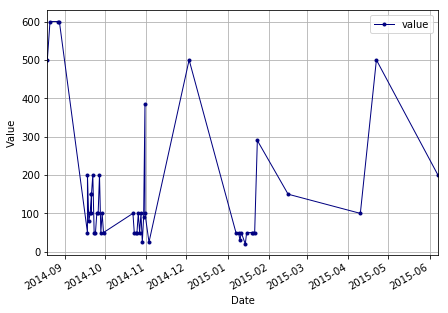

In [33]:
income.plot(x='cashflow_date', y='value', figsize=(7,5), grid=True, lw=1, colormap='jet', marker='.')
plt.xlabel('Date')
plt.ylabel('Value')

# Outcome

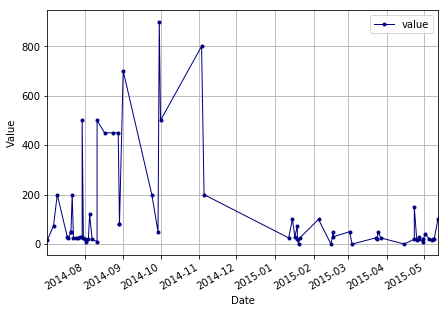

In [34]:
outcome.plot(x='cashflow_date', y='value', figsize=(7,5), grid=True, lw=1, colormap='jet', marker='.')
plt.xlabel('Date')
plt.ylabel('Value')

/Users/vizzuality/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735477.0, right=735477.0
  'left=%s, right=%s') % (left, right))


root_category
Cash                    Axes(0.125,0.2;0.775x0.68)
Financial               Axes(0.125,0.2;0.775x0.68)
Operational Expenses    Axes(0.125,0.2;0.775x0.68)
Operational Income      Axes(0.125,0.2;0.775x0.68)
Physical Asset          Axes(0.125,0.2;0.775x0.68)
dtype: object

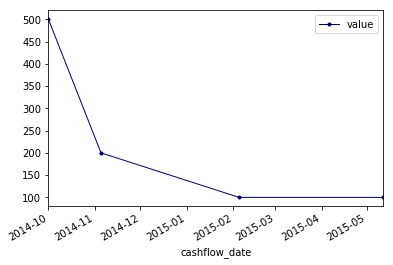

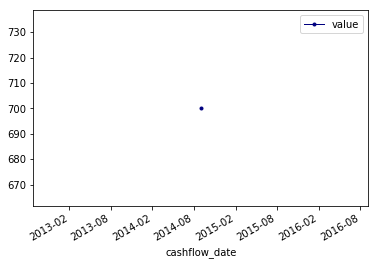

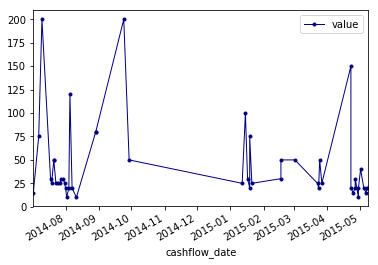

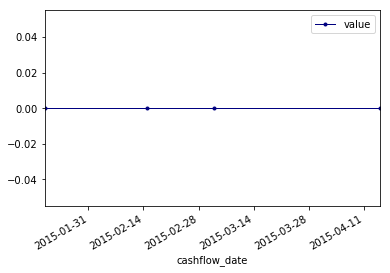

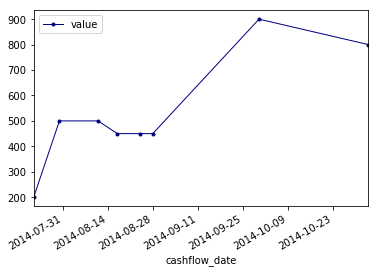

In [35]:
outcome=data[(data['id_member'] == 11) & (data['cf_direction'] == 'Out')]
outcome.groupby('root_category').plot(x="cashflow_date", y="value", lw=1, colormap='jet', marker='.')


# Income (one user)

In [111]:
income=data[(data['id_member'] == 11) & (data['cf_direction'] == 'In')]
income=income[['root_category', 'value', 'cashflow_date']]

income['color'] = 'blue'
income.loc[(income['root_category'] == 'Operational Income'), ['color']] = 'red'
income.loc[(income['root_category'] == 'Cash'), ['color']] = 'green'
income.loc[(income['root_category'] == 'Financial'), ['color']] = 'yellow'
income.loc[(income['root_category'] == 'Operational Expenses'), ['color']] = 'black'
print income.head()

for key, grp in income.groupby(['color']):
    fig, ax = plt.subplots()
    labels = []
    for key, grp in income.groupby(['color']):
        ax = grp.plot(ax=ax, kind='line', x='cashflow_date', y='value', c=key)
        labels.append(key)
    lines, _ = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

plt.show()

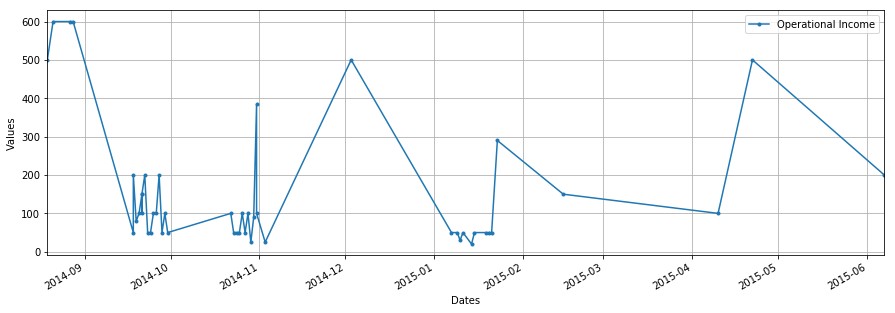

In [112]:

# make Date a true Datetime
income["cashflow_date"] = pd.to_datetime(income["cashflow_date"])
# create two new Dataframes
dfmin = income[income["root_category"] == "Operational Expenses"]
dfmax = income[income["root_category"] == "Physical Asset"]
dfmax1 = income[income["root_category"] == "Cash"]
dfmax2 = income[income["root_category"] == "Operational Income"]
dfmax3 = income[income["root_category"] == "Financial"]

# plot dataframes 
ax = dfmax2.plot(x='cashflow_date', y='value', marker='.', kind='line', figsize=(15,5) ,grid=True)
#dfmax.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
#dfmax1.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
#dfmax2.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
#dfmax3.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line',grid=True)

#ax.figure.autofmt_xdate()
ax.set_xlabel("Dates")
ax.set_ylabel("Values")
legend(['Operational Income'])
plt.show()

# Outcome per one user

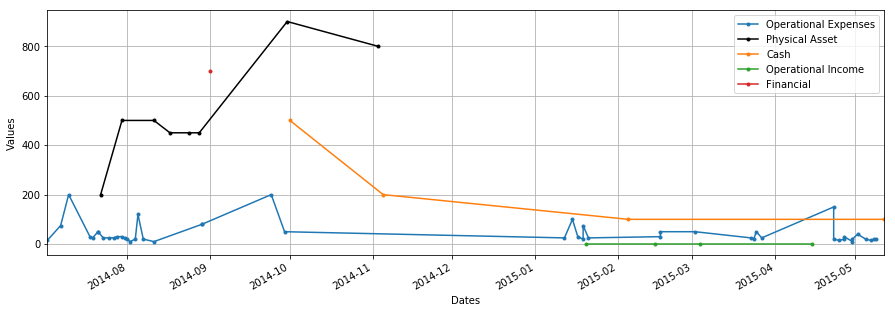

In [109]:
outcome=data[(data['id_member'] == 11) & (data['cf_direction'] == 'Out')]
outcome=outcome[['root_category', 'value', 'cashflow_date']]


# make Date a true Datetime
outcome["cashflow_date"] = pd.to_datetime(outcome["cashflow_date"])
# create two new Dataframes
dfmina = outcome[outcome["root_category"] == "Operational Expenses"]
dfmaxa = outcome[outcome["root_category"] == "Physical Asset"]
dfmaxb = outcome[outcome["root_category"] == "Cash"]
dfmaxc = outcome[outcome["root_category"] == "Operational Income"]
dfmaxd = outcome[outcome["root_category"] == "Financial"]

# plot dataframes 
ax = dfmina.plot(x='cashflow_date', y='value', marker='.', kind='line', figsize=(15,5))
dfmaxa.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line', color='black')
dfmaxb.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxc.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxd.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line',grid=True)

#ax.figure.autofmt_xdate()
ax.set_xlabel("Dates")
ax.set_ylabel("Values")
legend(['Operational Expenses', 'Physical Asset', 'Cash', 'Operational Income', 'Financial'])
plt.show()

# Total Outcome

In [133]:
outcome=data[(data['cf_direction'] == 'Out')]
outcome=outcome[['root_category', 'value', 'cashflow_date']]

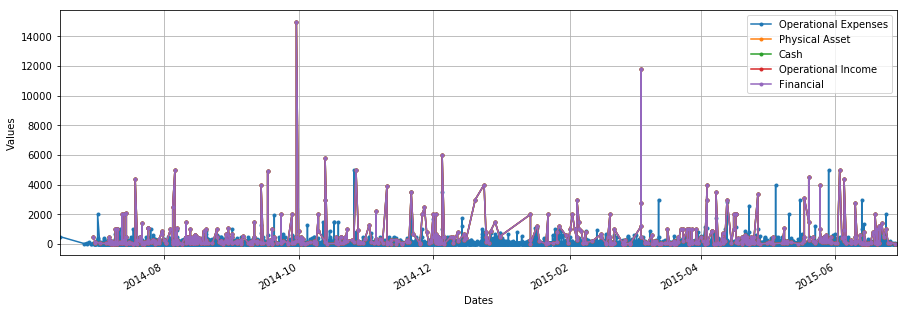

In [134]:
# make Date a true Datetime
outcome["cashflow_date"] = pd.to_datetime(outcome["cashflow_date"])
# create two new Dataframes
dfmina = outcome[outcome["root_category"] == "Operational Expenses"]
dfmaxa = outcome[outcome["root_category"] == "Physical Asset"]
dfmaxa = outcome[outcome["root_category"] == "Cash"]
dfmaxa = outcome[outcome["root_category"] == "Operational Income"]
dfmaxa = outcome[outcome["root_category"] == "Financial"]

# plot dataframes 
ax = dfmina.plot(x='cashflow_date', y='value', marker='.', kind='line', figsize=(15,5))
dfmaxa.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxa.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxa.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxa.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line',grid=True)

#ax.figure.autofmt_xdate()
ax.set_xlabel("Dates")
ax.set_ylabel("Values")
legend(['Operational Expenses', 'Physical Asset', 'Cash', 'Operational Income', 'Financial'])
plt.show()

# Total Income

In [116]:
income=data[(data['cf_direction'] == 'In')]
income=income[['root_category', 'value', 'cashflow_date']]

In [126]:
income = income[(income['cashflow_date'] > '2015-03-01')&(income['cashflow_date'] < '2015-05-01') ]
income.tail()

root_category  value cashflow_date
21119  Operational Income  150.0    2015-03-22
21130  Operational Income  250.0    2015-04-16
21135  Operational Income   40.0    2015-03-07
21137  Operational Income  150.0    2015-04-01
21141  Operational Income  200.0    2015-04-07

In [127]:
# make Date a true Datetime
income["cashflow_date"] = pd.to_datetime(income["cashflow_date"])
# create two new Dataframes
#dfmina = income[income["root_category"] == "Operational Expenses"]
dfmaxa = income[income["root_category"] == "Physical Asset"]
#dfmaxb = income[income["root_category"] == "Cash"]
dfmaxc = income[income["root_category"] == "Operational Income"]
dfmaxd = income[income["root_category"] == "Financial"]

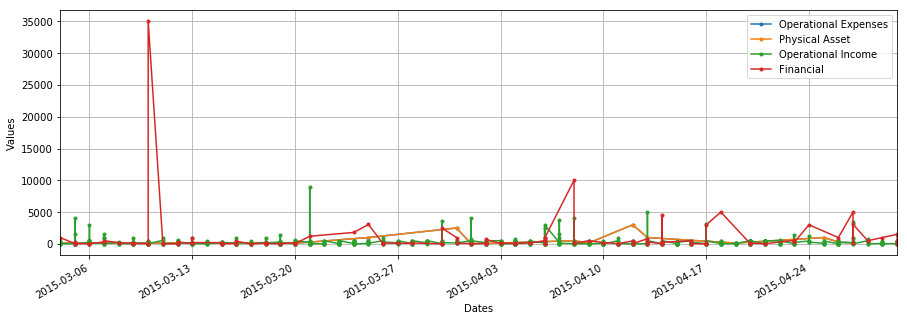

In [128]:
# plot dataframes 
ax = dfmaxa.plot(x='cashflow_date', y='value', marker='.', kind='line', figsize=(15,5))
dfmaxa.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
#dfmaxb.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxc.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxd.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line',grid=True)

#ax.figure.autofmt_xdate()
ax.set_xlabel("Dates")
ax.set_ylabel("Values")
legend(['Operational Expenses', 'Physical Asset', 'Operational Income', 'Financial'])
plt.show()

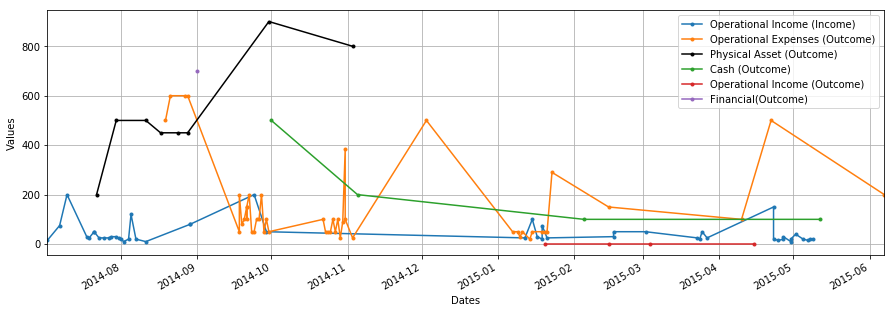

In [140]:
outcome=data[(data['id_member'] == 11) & (data['cf_direction'] == 'Out')]
outcome=outcome[['root_category', 'value', 'cashflow_date']]
income=data[(data['id_member'] == 11) & (data['cf_direction'] == 'In')]
income=income[['root_category', 'value', 'cashflow_date']]
income["cashflow_date"] = pd.to_datetime(income["cashflow_date"])
outcome["cashflow_date"] = pd.to_datetime(outcome["cashflow_date"])


# make Date a true Datetime

# create two new Dataframes
dfmina = outcome[outcome["root_category"] == "Operational Expenses"]
dfmaxa = outcome[outcome["root_category"] == "Physical Asset"]
dfmaxb = outcome[outcome["root_category"] == "Cash"]
dfmaxc = outcome[outcome["root_category"] == "Operational Income"]
dfmaxd = outcome[outcome["root_category"] == "Financial"]
a = income[income["root_category"] == "Operational Income"]

# plot dataframes 


ax = dfmina.plot(x='cashflow_date', y='value', marker='.', kind='line', figsize=(15,5))
ax1 = a.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line', figsize=(15,5) ,grid=True)
dfmaxa.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line', color='black')
dfmaxb.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxc.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line')
dfmaxd.plot(x='cashflow_date', y='value', ax=ax, marker='.', kind='line',grid=True)

#ax.figure.autofmt_xdate()
ax.set_xlabel("Dates")
ax.set_ylabel("Values")
legend(['Operational Income (Income)','Operational Expenses (Outcome)', 'Physical Asset (Outcome)', 'Cash (Outcome)', 
        'Operational Income (Outcome)', 'Financial(Outcome)'])
plt.show()